**$\S$ Embedding층의 가중치 행렬 $W_e$, RNN층의 가중치 행렬 $W_x$, $W_h$, 편향벡터 $b_r$, Affine층의 가중치 행렬 $W_a$, 편향벡터 $b_a$가
$$
W_e = \begin{pmatrix} -1&1 \\ 2&-1 \\ 1&-1 \\ -2&1 \\ 1&1 \\ 2&1 \\ -1&-1 \end{pmatrix}
, \quad
W_x = \begin{pmatrix} \log 2 & \log2 \\ \log 4 & \log 6 \end{pmatrix}, \qquad
W_h = \begin{pmatrix} -5\log 2 & -5\log3 \\ 5\log 2 & 5\log 3 \end{pmatrix}, \qquad
b_r=[0,0]
$$
$$
W_a = \begin{pmatrix} -5\log 2 & 20\log 2 & 0&0&0&0&0 \\ 5\log 2 & -15\log 2 & 0&0&0&0&0 \end{pmatrix}, \qquad
b_a=[0,0,0,0,0,0,0]
$$
인 다음과 같은 RNN 언어 모델을 생각하자.**
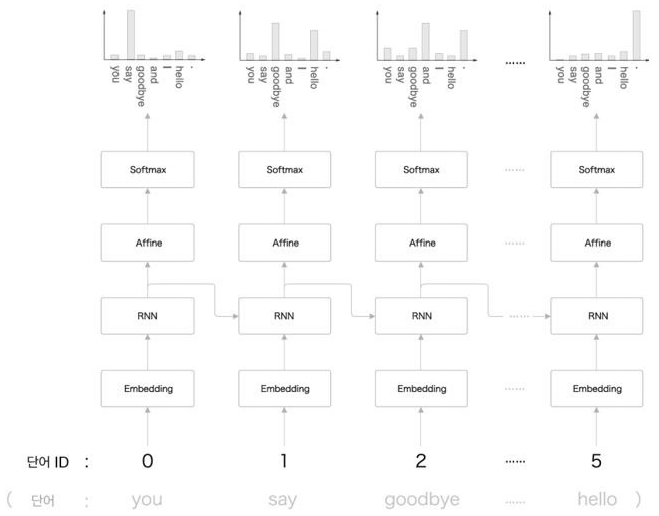

**1. 배치크기는 1, 타임 블럭 길이는 2로 학습을 시키려 한다. 첫번째 블럭 [you, say]를 입력했을때 손실함수 값을 구하시오.**

[you,say]=[0,1]이 Embedding층으로 입력되면 가중치 행렬의 0행과 1행을 뽑아서 you와 say의 벡터표현
$$[x_0,x_1] = [[-1,1],[2,-1]]$$
을 얻습니다.

RNN층에서는 7강 2번문제와 동일한 변환을 합니다.  
$t=0$은 시작 시점이기 때문에 과거에서 흘러들어온 hidden state가 없겠죠.  
따라서, 입력 데이터 $x_0$에 대해서만 Affine변환
$$
x_0 W_x +b_r = \begin{pmatrix} -1 & 1\end{pmatrix} \begin{pmatrix} \log 2 & \log2 \\ \log 4 & \log 6 \end{pmatrix}
= \begin{pmatrix} \log2 & \log3 \end{pmatrix}
$$
을 합니다.  
쌍곡 탄젠트 함수
$$
{\rm tahn}x = {e^{2x}-1 \over e^{2x}+1}
$$
를 취하면 hidden state
$$
h_0 = ({e^{2\log2}-1 \over e^{2\log2}+1}, {e^{2\log3}-1 \over e^{2\log3}+1}) = ({4-1 \over 4+1}, {9-1 \over 9+1})
= ({3 \over 5}, {4 \over 5})
$$
를 얻습니다.

hidden state $h_0$는 다음층으로 전달됨과 동시에 은닉층을 순환하여 다음 시각 $t=1$에 전달이 됩니다.  
$t=1$일 때는 입력 데이터 $x_1$뿐 아니라 과거에서 전달된 hidden state $h_0$에도 Affine 변환
$$
\begin{aligned}
x_1 W_x + h_0 W_h + b_r &= \begin{pmatrix} 2 & -1\end{pmatrix} \begin{pmatrix} \log 2 & \log2 \\ \log 4 & \log 6 \end{pmatrix}
+ \begin{pmatrix} {3 \over 5} & {4 \over 5} \end{pmatrix} \begin{pmatrix} -5\log 2 & -5\log3 \\ 5\log 2 & 5\log 3 \end{pmatrix} \\
&= \begin{pmatrix} 0 & 2\log2-\log6 \end{pmatrix} + \begin{pmatrix} \log2 & \log3 \end{pmatrix} \\
&= \begin{pmatrix} \log2 & \log2 \end{pmatrix}
\end{aligned}
$$
을 합니다.  
쌍곡 탄젠트 함수를 취하면 hidden state
$$
h_1 = ({e^{2\log2}-1 \over e^{2\log2}+1}, {e^{2\log2}-1 \over e^{2\log2}+1}) = ({4-1 \over 4+1}, {4-1 \over 4+1})
= ({3 \over 5}, {3 \over 5})
$$
을 얻습니다.

Affine층에서는 $h_0$와 $h_1$을 받아 Affine변환을 해서 스코어
$$
s_0 = h_0 W_a +b_a = \begin{pmatrix} {3 \over 5} &  {4 \over 5}\end{pmatrix} \begin{pmatrix} -5\log 2 & 20\log 2 & 0&0&0&0&0 \\ 5\log 2 & -15\log 2 & 0&0&0&0&0 \end{pmatrix}
= \begin{pmatrix} \log2 & 0&0&0&0&0&0 \end{pmatrix}
$$
$$
s_1 = h_1 W_a +b_a = \begin{pmatrix} {3 \over 5} &  {3 \over 5}\end{pmatrix} \begin{pmatrix} -5\log 2 & 20\log 2 & 0&0&0&0&0 \\ 5\log 2 & -15\log 2 & 0&0&0&0&0 \end{pmatrix}
= \begin{pmatrix} 0&3\log2 &0&0&0&0&0 \end{pmatrix}
$$
를 얻습니다.  
softmax층에서는 스코어 $s_1, s_2$에 $e^x$을 먼저 취하고
$$
(2,1,1,1,1,1,1), \qquad (1,8,1,1,1,1,1)
$$
노멀라이즈를 해서 확률분포
$$
y_0 = ({1 \over 4},{1 \over 8},{1 \over 8},{1 \over 8},{1 \over 8},{1 \over 8},{1 \over 8}), \qquad
y_1 = ({1 \over 14},{4 \over 7},{1 \over 14},{1 \over 14},{1 \over 14},{1 \over 14},{1 \over 14})
$$
를 얻습니다.  
you=0의 라벨은 그 다음 단어인 say=1이고 say의 라벨은 그 다음 단어인 goodbye=2입니다.  
확률벡터에서 라벨자리의 확률을 뽑아 $-\log$를 씌우면 각각의 교차엔트로피
$$
L_1 = -\log {1 \over 8}, \qquad L_2 = -\log {1 \over 14}
$$
를 얻습니다.  
평균하여 최종 손실함수 값
$$
{1 \over 2}(-\log {1 \over 8}-\log {1 \over 14}) = {\log112 \over 2}
$$
을 얻습니다.

**2. SimpleRnnlm 클래스의 파라미터 초기값을 위와 같이 수정한 후 인스턴스를 만들어 손실함수 값을 검산하시오.**

In [1]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch 2') # 각자의 경로로 수정해주세요.
import numpy as np
from common.time_layers import *

SimpleRnnlm 클래스는 초기화할때 가중치 행렬을 랜덤하게 잡기 때문에 초기화 코드를 주어진 가중치 행렬로 수정합니다.

In [2]:
class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        embed_W = np.zeros((7,2))
        embed_W[0] = np.array([-1,1])
        embed_W[1] = np.array([2,-1])
        rnn_Wx = np.log(np.array([[2,2],[4,6]]))
        rnn_Wh = np.array([[-5*np.log(2),-5*np.log(3)],[5*np.log(2),5*np.log(3)]])
        rnn_b = np.zeros(2)
        affine_W = np.zeros((2,7))
        affine_W[:,0] = 5*np.array([-np.log(2),np.log(2)])
        affine_W[:,1] = 5*np.array([4*np.log(2),-3*np.log(2)])
        affine_b = np.zeros(7)

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.rnn_layer.reset_state()

LM = SimpleRnnlm(7,2,2)

xs = np.array([[0,1]])
ts = np.array([[1,2]])

print(LM.forward(xs,ts))

2.359249363715546


손계산 결과와 맞아 떨어지네요.

In [3]:
print(np.log(112)/2)

2.359249435647547


**3. 인스턴스로 역전파를 실행해서 6개의 파라미터에 대한 미분을 구하시오.**

역전파를 실행하면 self.grads에 각 파라미터들의 미분이 저장됩니다.

In [4]:
LM.backward()
print('dWe : '+str(LM.grads[0]))
print('='*70)
print('dWx : '+str(LM.grads[1]))
print('='*70)
print('dWh : '+str(LM.grads[2]))
print('='*70)
print('dbr : '+str(LM.grads[3]))
print('='*70)
print('dWa : '+str(LM.grads[4]))
print('='*70)
print('dba : '+str(LM.grads[5]))

dWe : [[-1.34892786 -2.189219  ]
 [ 0.43927133  0.13979055]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]
dWx : [[ 8.1119875  -4.89842674]
 [-5.65626596  3.0764398 ]]
dWh : [[ 1.47343292 -1.09319217]
 [ 1.96457723 -1.45758956]]
dbr : [-0.7448229  -0.56753409]
dWa : [[ 0.09642857 -0.09107142 -0.24107144  0.05892857  0.05892857  0.05892857
   0.05892857]
 [ 0.12142857 -0.17857141 -0.22857144  0.07142857  0.07142857  0.07142857
   0.07142857]]
dba : [ 0.16071428 -0.15178569 -0.40178572  0.09821428  0.09821428  0.09821428
  0.09821428]
